# Preliminaries

This chapter is in extremely condensed form and lacks lot of explanatory information for the sake of brevity. If you are new to the field of machine learning, I recommend that you first read [Murphy (2012)](https://www.amazon.com/Machine-Learning-Probabilistic-Perspective-Computation/dp/0262018020/)  (comprehensive reference) or [Abu-Mostafa et al. (2012)](https://www.amazon.com/Learning-Data-Yaser-S-Abu-Mostafa/dp/1600490069/)  (cheap and very accessible) or [Bishop (2006)](https://www.amazon.com/Pattern-Recognition-Learning-Information-Statistics/dp/0387310738/) (first book that I read on Machine Learning) or [Hastie et al. (2003)](http://statweb.stanford.edu/~tibs/ElemStatLearn/printings/ESLII_print10.pdf). There are also lot of free introductory lectures by professors like [Andrew Ng](https://www.coursera.org/learn/machine-learning), [Yaser Abu-Mostafa](http://work.caltech.edu/telecourse.html), William Press etc that you can watch. I will assume that you have basic understanding of probability, statistics and linear algebra. Also, I admit that I have "oversimplified" few sections by providing you with high-level intuition, examples and code (in R or Mathematica) instead of mathematical rigor (i.e. proofs).

## Overview of Probability and Statistics

Probability $p$ is a non-negative real number between 0 and 1 (in particular a measure of expectation of an event) that obeys the law of an axiomatic system and can have one of following interpretation<sup>1</sup>:
1. **Classical interpretation**: We have knowledge of all possible outcomes of an experiment and believe that all outcomes have equal probability. For example: the probability that coin lands head is 
$$p(head) = \dfrac{\text{number of possible outcomes corresponding to head}}{\text{total number of outcomes}} = \dfrac{1}{2}$$
2.  **Frequency/Objective interpretation**: The probability is a *relative frequency* of occurrence, in the limit as the number of trials approaches infinity, of an experiment's outcome. For example: As number of coin tosses $n \rightarrow \infty$, 
$$ p(head) = \frac{\text{number of heads}}{n} $$ 

    An obvious counter-example to this interpretation: probability of survival after surgery for patient X cannot be found by doing surgery $n$ times on that patient and counting how many times he/she survives. Instead, the doctor uses his experience (i.e. combination of outcomes of similar surgeries in the past and his state of mind) to estimate the probability of survival, i.e. the doctor specifies his degree of belief.

3. **Subjective interpretation**: The probability is a measure of the *degree of belief*, rather than actual frequency. An objection to this interpretation will be that different people have different viewpoints of the world and hence different degree of beliefs. Also, most people are bad at reasoning with probabilities (as you will find out in [the later section](#Monte-Hall-Problem)). So, we use bayesian probability theory, that specifies a methodology to update our degree of belief in a given hypothesis in light of new evidence, to distinguish between good reasoning and bad reasoning. 

Rather than worrying about which interpretation of probability is correct, you should ask yourself which interpretation is applicable for your problem.

Here is a high-level intuition of probability using the **hidden variable theory**: The deterministic point of view<sup>2</sup> says that if we knew the exact weight/shape of coin, environmental factors (wind direction/strength, humidity), surface friction, density of coin, exact hand movements (angle of release, force during release), effect due to rotation of the earth and many many other factors, then we can predict the exact outcome of the coin. Since it is not feasible to calculate precisely many of these factors (i.e hidden variables), we cannot predict the exact outcome of the coin. To model these variables, so that we can get very close to predicting the outcome and in some way make the experiment useful, we use the concept of probability. This is precisely why probability is so useful in Machine Learning.


### Axioms of probability

For any event A in sample space (i.e. set of all possible outcomes) $\Omega$, 

1. $p(A) \geqslant 0$
2. $p(\Omega) = 1$
3. Let $A_1, A_2, ..., A_k$ be pairwise mutually exclusive event (ME), then $p(A_1 \cup A_2 \cup ... \cup A_k) = \sum_{i=1}^k p(A_i)$

### Laws of probability

To prove the following laws, either draw Venn diagram or derive them using above axioms. For now, we will just use them without any proof.

1. **Sum rule**: $p(A_1 \cup A_2) = p(A_1) + p(A_2) - p(A_1 \cap A_2)$
    * Extension to 3 events: $p(A_1 \cup A_2 \cup A_3) = p(A_1) + p(A_2) + p(A_3) - p(A_1 \cap A_2) - p(A_1 \cap A_3) - p(A_2 \cap A_3) + p(A_1 \cap A_2 \cap A_3)$
    * General case: $p(\cup_{i=1}^n A_i) = \displaystyle\sum_{k=1}^{n} \left\{ (-1)^{k-1} \sum_{I \subset \{1, 2, ..., n\}, |I| = k} p(\cap_{i \in I} A_i) \right\}$.
        
        For example: the second term (i.e. $k = 2$) is "$-\displaystyle\sum_{i, j : i < j} p(A_i \cap A_j)$" and the third term is $\displaystyle\sum_{i, j, k : i < j < k} p(A_i \cap A_j \cap A_j)$.

2. **Multiplicative rule**: $p(A_1 \cap A_2) = p(A_1) \; p(A_2 \; | \; A_1) = p(A_2) \; p(A_1 \; | \; A_2)$
    * General case: $p(A_1  \cap A_2 \cap ... \cap A_k) = p(A_1) \; p(A_2  \; | \; A_1) \; p(A_3 \; | \; A_2 \cap A_1) \; ... \; p(A_k  \; | \; A_{k-1} \cap  ... \cap A_1)$.

3. **Mutually exclusive** (events A, B): $\;\; p(A \cap B) = 0$

4. **Independent** (events A, B): $\qquad \; p(A \cap B) = p(A) p(B)$

Other useful laws:

1. **Law of Exhaustion**: Assuming that the sample space consists of mutually exclusive events $H_i$, then $\displaystyle\sum_{i} p(H_i) = 1$.

2. **Law of Total probability**: If we add an another event $E$ in the sample space described in point 1, then

$$p(E) = p(E \cap H_1) + p(E \cap H_2) + p(E \cap H_3) + p(E \cap H_4) + p(E \cap H_5)$$
$$p(E) = \displaystyle\sum_{i} p(E \; | \; H_i) p(H_i)$$

An easy way to understand the above two laws is by drawing the Venn diagram of the sample space. First, we draw a sample space (as a square), then divide it into mutually exclusive events $H_1, H_2, H_3, H_4, H_5$. Finally, we draw an event E (as an ellipse).
    
<img src="images/probability_bayes.png" alt="Venn diagram explaining taw of total probability" style="width: 250px;"/>
    
### Bayes' theorem

Let's derive Bayes' theorem using above laws,
$$
\begin{align*}
p(H_i | E) &= \dfrac{p(H_i \cap E)}{p(E)}  & \text{ ...  Multiplicative rule} \\
&= \dfrac{p(H_i \cap E)}{\displaystyle\sum_{i} p(E | H_i) p(H_i)}  & \text{ ...  Law of total probability} \\
&= \dfrac{p(H_i) p(E | H_i)}{\displaystyle\sum_{i} p(E | H_i) p(H_i)}  & \text{ ...  Multiplicative rule} \\
p(H_i | E) &\propto p(H_i) \times p(E | H_i)   & \text{ ...  since denominator can be treated as normalizing constant} \\
\text{i.e., posterior } &\propto \text{prior } \times \text{ likelihood}  & \text{ ...  hypothesis or model parameters: } H_i \text{ and evidence or observed data: } E \\
\end{align*}
$$

### Monte Hall Problem

Few years back, I gave a lecture at Jacob Sir's classes, where I described Monte Hall problem,  which suprisingly none of my students had heard about. This was fortunate because this meant everyone would have to think about it on their own, rather than provide a prepared answer (thought-through by someone else). So, here is the problem:

There are three doors D1, D2 and D3; behind two of them there is a goat and behind the other is a car. The objective of the game is to win a car. So, you have to guess which door to chose ... Does it make difference whether you chose D1, D2 or D3 ? ... The consensus was NO, because the Prob(win)=0.33 for each of the door. 

To make the problem interesting the game show host (who know which door has car and which doors has goats), opens one of the remaining door that has goat. He now asks you based on this information whether you would like to switch your earlier choice. For example, earlier you chose D1 and the game show host opens D2 and shows that it has goat. Now you can either stick to D1 or switch to D3. The real question we are interested in is:
Does switching the door make more sense or staying with the same door ? or It does not matter whether you chose D1 or D3.

Interesting but incorrect answers that were given by my students:
1. It does not matter whether you chose D1 or D3, because Prob(win) for each door is now 0.5
2. Staying with the door makes more sense, since we have increased the Prob(win) from 0.3 to 0.5
3. We really don't have plausible reason to switch, hence stay with the same door; especially since the game show host may want to trick us.

The correct answer is switching doubles the Prob(win), hence it makes more sense. Let's solve this problem using Bayes' theorem.

Let's use following notation for Monte Hall problem:

C1 $\Rightarrow$ car is behind door 1

D2 $\Rightarrow$ game show host opened door 2

S3 $\Rightarrow$ before game show host revealing any doors, you selected door 3

Let's assume you pick door 2 and game show host opens door 3. Note, the choice of our doors is arbitrary and hence there is no loss of generality.

Before game show reveals the door, car is equally likely to be behind any of the doors:
$$
p(C1) = p(C2) = p(C3) = \frac{1}{3}
$$

This does not change if you select any arbitrary door with no information from the game show host:
$$
p(C1 \; | \; S1) = p(C1 \; | \; S2) = p(C1 \; | \; S3) = p(C2 \; | \; S1) = p(C2 \; | \; S2) = ... = \frac{1}{3}  \qquad (prior \; knowledge)
$$

Let's evaluate few cases:
1. Car is behind door 1 and you picked door 2. Therefore, the game show host is forced to open door 3 $\Rightarrow p(D3 \; | \; C1 \cap S2) = 1$.
2. Car is behind door 2 and you picked door 2. Assuming the game show host has no preference for door 1 or door 3, he can randomly open any of the two remaining doors $\Rightarrow p(D3 \; | \; C2 \cap S2) = \frac{1}{2}$.
3. Car is behind door 3 and you picked door 2. Since the car is behind door 3, the game show host cannot open door 3 $\Rightarrow p(D3 \; | \; C3 \cap S2) = 0$.


Using above information, examine the probability of car behind each of the door using this information<sup>3</sup>:
$$
\begin{align*}
p(C1 \;  | \; D3 \cap S2) & \propto p(D3 \; | \; C1 \cap S2) p(C1 \; | \; S2) = \frac{2}{6} \\
p(C2 \; | \; D3 \cap S2) & \propto p(D3 \; | \; C2 \cap S2) p(C2 \; | \; S2) = \frac{1}{6} \\
p(C3 \; | \; D3 \cap S2) & \propto p(D3 \; | \; C3 \cap S2) p(C3 \; | \; S2) = 0
\end{align*}
$$

This means if you have selected door 2, its better to switch your choice to door 1 because considering the structure of the game, the car is twice as likely to be in the door 1 (i.e. the door you didn't select) than in door 2 (i.e. door you did select). This problem is a good exercise to see how probabilities are modified by the data. 

### Moments

The $k^{th}$ moment of a random variable $X$ with probability distribution function (pdf) $f(x)$ about a value c is:
$$
\begin{align*}
\mathbb{E}[(X - c)^k] = \int\limits_{- \infty}^{\infty} (x - c)^k f(x) dx
\end{align*}
$$

There are three types of moments:
1. Raw moment: $c = 0$
2. Central moment: $c = $  mean $= \mu$
3. Standardized moment: $\mathbb{E}\left[ \left(\dfrac{X-\mu}{\sigma}\right)^k \right] = \dfrac{\text{Central moment}}{\sigma^k}$

There are four important statistic that can be used to describe at a high level how the pdf of a distribution looks like:
1. Mean ($\mu = \mathbb{E}[X]$): It is the first raw moment<sup>4</sup> and specifies where the distribution might be centered<sup>5</sup>.

2. Variance ($\sigma^2 = \mathbb{E}[(X - \mu)^2]$): It is the second central moment and specifies how wide the distribution is. 

3. Skewness: It is the third standardized moment and specifies how asymmetric a distribution is (as show in below figure).<sup>6</sup>

    <img src="images/skewness.png" alt="Skewness" style="width: 400px;"/>

4. Kurtosis: It is the fourth standardized moment and specifies whether you distribution looks a pointy hat<sup>7</sup> or like square hat. 
    
    <img src="images/kurtosis.jpg" alt="Skewness" style="width: 300px;"/>
    
The below code shows how to compute the above mentioned statistics on a given data. The histogram of the data is plotted for your understanding of above concepts.

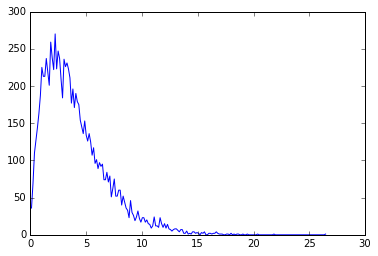

Mean: 4.01695797458, Variance: 7.86913862271, 3rd Moment: 29.7633605389, 4th Moment: 350.379427229, Skewness: 1.34831439549, Kurtosis: 2.65827702702


In [59]:
%matplotlib inline
import matplotlib.pyplot as plt
import systemml as sml
import numpy as np
import math
# Generate random data from gamma distribution
data = sml.matrix(np.random.gamma(2, scale=2, size=(10000, 1)))
# Plot the generated data 
y, binEdges=np.histogram(data,bins=200)
bincenters = 0.5*(binEdges[1:]+binEdges[:-1])
plt.plot(bincenters, y, '-')
plt.show()
# Compute mean, variance, 3rd and 4th moment as well as skew and kurtosis using SystemML
m1 = data.mean().toNumPyArray()
m2 = data.var().toNumPyArray()
m3 = data.moment(3).toNumPyArray()
m4 = data.moment(4).toNumPyArray()
std_dev = math.sqrt(m2)
sk = m3/(std_dev**3)
kt= m4/(std_dev**4) - 3
print("Mean: " + str(m1) + ", Variance: " + str(m2) + ", 3rd Moment: " + str(m3) + ", 4th Moment: " + str(m4) 
      + ", Skewness: " + str(sk) + ", Kurtosis: " + str(kt))

---

Footnotes:

<sup>1</sup> I am omitting propensity interpretation of probability by Karl Popper, which is used in Philosophy to make sense of single-case probabilities (eg: outcome of a particular coin toss), but almost always ignored in Statistics and related branches.

<sup>2</sup> A stochastic point of view, on other hand, says that there is inherent quantum indeterminacy in every physical system (search wikipedia for Hiesenberg's uncertainty principle if you want to know more), which means you cannot precisely determine the state of a physical system.

<sup>3</sup> In this case, the hypothesis is $H = \{ C_1, C_2, C_3\}$ and evidence is $E = \{ D_3 \}$.

<sup>4</sup> Note, first central and standardized moments evaluate to zero (i.e. $\mathbb{E}[X - \mu] = \mathbb{E}[\left( \dfrac{X - \mu}{\sigma}  \right)]$).

<sup>5</sup> The peak of the distribution is at *mode* (i.e. most frequent value) and the median is the middle value separating the greater and lesser halves of a data set.

<sup>6</sup> Note, $\sigma = \sqrt{variance} =$ standard deviation and covariance of two random variable $X, Y = cov(X, Y) = \mathbb{E}[(X -\mu_X)(Y-\mu_Y)]$.

<sup>7</sup> Mnemonic: "P" for pointy hat as well as positive kurtosis.

[Previous Chapter](http://nbviewer.jupyter.org/github/niketanpansare/systemml-book/blob/master/Chapter1_Introduction.ipynb)  $\qquad \qquad \qquad \qquad $   [Main Page](https://niketanpansare.github.io/systemml-book/) $\qquad \qquad \qquad  \qquad $ Next Chapter